In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
from sklearn import metrics 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve, mean_squared_error, make_scorer

### WIFI_TX_FREQ_ACCURACY_TEST
- SATURATION_POWER - LOW LIMIT 23.7 ( NO HIGH LIMIT )
- PPM - +-5.5

In [4]:
data = pd.read_csv('Dataset/WW2122_FinalMerge2.csv')

In [5]:
data = data.iloc[:,38:]

In [6]:
df = data.copy()

In [5]:
wifi_pre_tx_freq_test = df.filter(regex='(DEVICE|WIFI_RX_CURRENT|WIFI_TX_CURRENT)')

In [6]:
totrain = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
totest = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [7]:
train = testdf[['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A', 'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']].sample(frac=0.8,random_state=200) #random state is a seed value
test = testdf[['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A', 'All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']].drop(train.index)

X_train = train.iloc[:,0]
y_train = train.iloc[:,1]
X_test = test.iloc[:,0]
y_test = test.iloc[:,1]

In [8]:
actual = df.filter(regex='(WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A)')

In [9]:
train_Actual = train.join(actual)
test_Actual = test.join(actual)

In [10]:
def nans(df): 
    return df[df.isnull().any(axis=1)]
def nonnans(df): 
    return df[~df.isnull().any(axis=1)]
train_Actual_failed = nans(train_Actual)
print("Actual Failed in train dataset: ", train_Actual_failed.shape[0])
test_Actual_failed = nans(test_Actual)
print("Actual Failed in test dataset: ", test_Actual_failed.shape[0])
train_Actual_passed = nonnans(train_Actual)
print("Actual Passed in train dataset: ", train_Actual_passed.shape[0])
test_Actual_passed = nonnans(test_Actual)
print("Actual Passed in test dataset: ", test_Actual_passed.shape[0])

Actual Failed in train dataset:  35
Actual Failed in test dataset:  10
Actual Passed in train dataset:  655470
Actual Passed in test dataset:  163866


In [11]:
test_Actual_failed.index

Int64Index([780576, 785475, 791099, 791278, 800840, 811742, 812335, 816055,
            816293, 816641],
           dtype='int64')

In [12]:
overall_failed = pd.concat([train_Actual_failed,test_Actual_failed], axis=0)

In [13]:
overall_failed.head(3)

,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A,All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A,All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A
812790,23.620,23.746,NaN,NaN
780607,23.720,23.732,NaN,NaN
804716,23.726,23.718,NaN,NaN


In [14]:
overall_failed.index

Int64Index([812790, 780607, 804716, 782872, 816642, 817373, 782887, 812618,
            791345, 778127, 811860, 777923, 777920, 785357, 798006, 774392,
            775763, 778073, 817400, 777946, 775783, 789147, 786019, 780505,
            817897, 780638, 824687, 817261, 820575, 780456, 817751, 775581,
            789058, 800823, 780592, 780576, 785475, 791099, 791278, 800840,
            811742, 812335, 816055, 816293, 816641],
           dtype='int64')

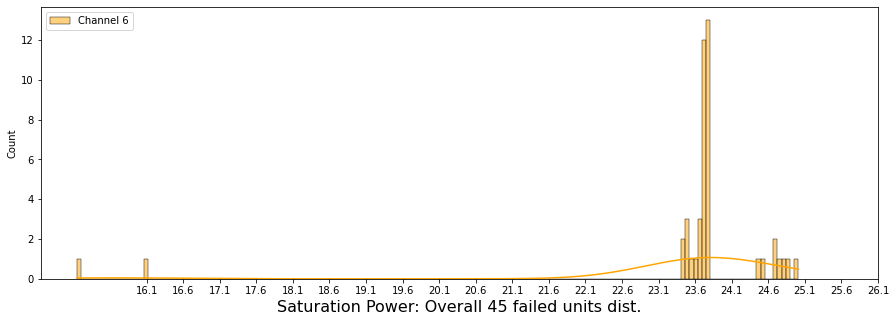

In [20]:
%matplotlib inline 
plt.figure(figsize=(15,5))
sns.histplot(data=overall_failed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, color = "orange", label = "Channel 6")
plt.xlabel("Saturation Power: Overall 45 failed units dist.", fontsize=16)
plt.xticks(np.arange(min(train.iloc[:,1]), max(train.iloc[:,1])+1, 0.5))
plt.legend(loc = "upper left")
plt.show()

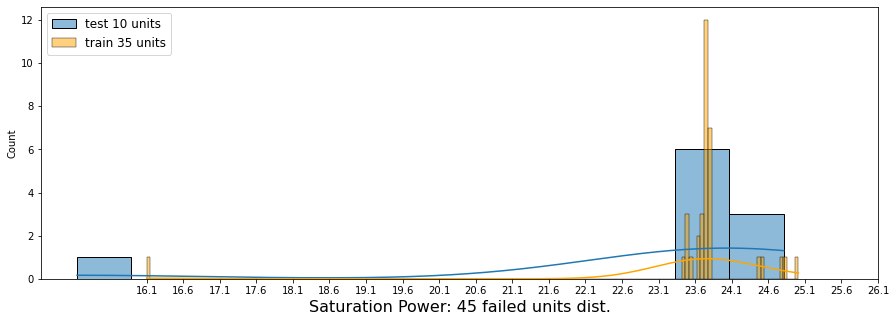

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(data=test_Actual_failed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, label = "test 10 units")
sns.histplot(data=train_Actual_failed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, color = "orange", label = "train 35 units")
plt.xlabel("Saturation Power: 45 failed units dist.", fontsize=16)
plt.xticks(np.arange(min(train.iloc[:,1]), max(train.iloc[:,1])+1, 0.5))
plt.legend(loc = "upper left", fontsize=12)
plt.show()

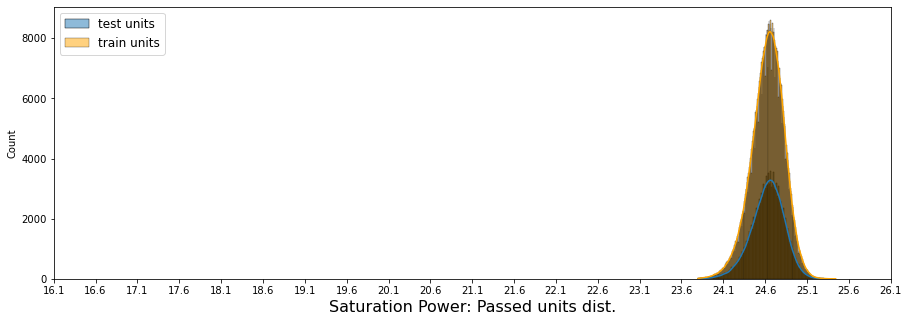

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(data=test_Actual_passed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, label = "test units")
sns.histplot(data=train_Actual_passed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, color = "orange", label = "train units")
plt.xlabel("Saturation Power: Passed units dist.", fontsize=16)
plt.xticks(np.arange(min(train.iloc[:,1]), max(train.iloc[:,1])+1, 0.5))
plt.legend(loc = "upper left", fontsize=12)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Polynomial Features
# degrees = 4
# poly = PolynomialFeatures(degree=degrees)
# X_train_poly = poly.fit_transform(X_train.to_frame())
# X_test_poly = poly.fit_transform(X_test.to_frame())

# Standardization
# scaler = StandardScaler()

# Normalization
# scaler = MinMaxScaler()

#Lasso Regression Model
# X_train_scaled = scaler.fit_transform(X_train_poly)
# X_test_scaled = scaler.transform(X_test_poly)

# #No feature scaling
# linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
# y_test_lassopredict = linlasso.predict(X_test_poly)
# Lasso_R2_test_score = r2_score(y_test, y_test_lassopredict)

# #With feature scaling
# linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train)
# y_test_lassopredict_scaled = linlasso.predict(X_test_scaled)
# Lasso_R2_test_score_scaled = r2_score(y_test, y_test_lassopredict_scaled)

# %matplotlib notebook
# plt.figure()

# sns.relplot(x=X_test, y=y_test, hue="size", label='Test data');
# sns.relplot(x=X_test, y=y_test_lassopredict, hue="size", color="orange", label='Predict data - No Scaling');
# sns.relplot(x=X_test, y=y_test_lassopredict_scaled, hue="size",color="green", label='Predict data - With Scaling');

# plt.show()

In [24]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(type(model).__name__)
print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))
    
model.coef_,model.intercept_

LinearRegression
    MAE 0.09336693441998258
    RMSE 0.119661216696291
    R2 0.6354902093106484


(array([0.73746327]), 6.504579914481809)

In [26]:
# model = LinearRegression()
# model.fit(X_train_poly, y_train)
# y_test_pred = model.predict(X_test_poly)
# y_train_pred = model.predict(X_train_poly)

# print(type(model).__name__)
# print("    MAE", mean_absolute_error(y_test, y_test_pred))
# print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
# print("    R2", r2_score(y_test, y_test_pred))
    
# model.coef_,model.intercept_

In [27]:
X_test_actual_failed = (test_Actual_failed.iloc[:,0].to_frame())
# X_test_actual_failed = (test_Actual_failed.iloc[:,0].to_frame())
y_test_pred_actual_failed = model.predict(X_test_actual_failed)

In [28]:
print("Actual 10 failed units X_test(X_test predict y_test) Values: \n\n", list(X_test_actual_failed.iloc[:,0].values))

Actual 10 failed units X_test(X_test predict y_test) Values: 

 [23.618, 23.674, 24.373, 23.715, 24.681, 23.654, 23.654, 24.599, 24.598, 23.936]


In [29]:
print(test_Actual_failed.iloc[:,1].values)
print("\nActual 10 failed units describe")
test_Actual_failed.iloc[:,1].describe()

[23.613 23.782 15.151 23.776 24.712 23.783 23.458 24.814 24.705 23.77 ]

Actual 10 failed units describe


count    10.00000
mean     23.15640
std       2.85766
min      15.15100
25%      23.65225
50%      23.77900
75%      24.47450
max      24.81400
Name: All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A, dtype: float64

In [30]:
test_Actual_failed.iloc[:,1] < 23.7

780576     True
785475    False
791099     True
791278    False
800840    False
811742    False
812335     True
816055    False
816293    False
816641    False
Name: All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A, dtype: bool

In [31]:
print(y_test_pred_actual_failed)
print("\nPredicted 10 failed units describe\n")
print("mean   ", np.mean(y_test_pred_actual_failed))
print("std   ", np.std(y_test_pred_actual_failed))
print("min   ", np.min(y_test_pred_actual_failed))
print("max   ", np.max(y_test_pred_actual_failed))

[23.92198754 23.96328548 24.47877231 23.99352148 24.705911   23.94853622
 23.94853622 24.64543901 24.64470155 24.15650086]

Predicted 10 failed units describe

mean    24.240719165982775
std    0.3189942212907976
min    23.9219875386159
max    24.705910999724146


<IPython.core.display.Javascript object>


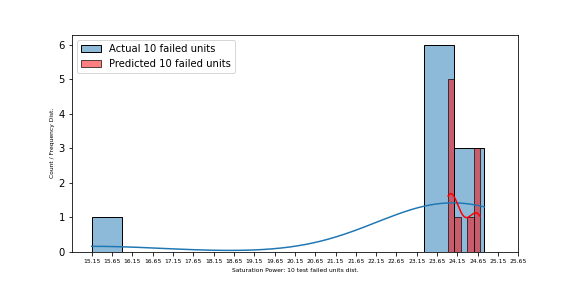

In [36]:
%matplotlib notebook
plt.figure(figsize=(8,4))
sns.histplot(data=test_Actual_failed, x='All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, label='Actual 10 failed units')
sns.histplot(y_test_pred_actual_failed, kde=True, color = "red", label='Predicted 10 failed units')
plt.xlabel("Saturation Power: 10 test failed units dist.", fontsize=6)
plt.ylabel("Count / Frequency Dist.", fontsize=6)
plt.xticks(np.arange(min(test_Actual_failed.iloc[:,1]), max(test_Actual_failed.iloc[:,1])+1, 0.5), fontsize=6)
plt.legend(loc = "upper left", prop={'size': 10})
plt.show()

In [37]:
totrain = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
totest = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [38]:
train = testdf[['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A', 'All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']].sample(frac=0.8,random_state=200) #random state is a seed value
test = testdf[['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A', 'All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']].drop(train.index)

X_train = train.iloc[:,0]
y_train = train.iloc[:,1]
X_test = test.iloc[:,0]
y_test = test.iloc[:,1]

In [39]:
X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(type(model).__name__)
print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))
    
model.coef_,model.intercept_

LinearRegression
    MAE 0.19935932423670347
    RMSE 0.24766815537642062
    R2 0.5651895806095957


(array([0.72665404]), 0.2834326930261473)

In [41]:
train_Actual = train.join(actual)
test_Actual = test.join(actual)

In [42]:
train_Actual_failed = nans(train_Actual)
print("Actual Failed in train dataset: ", train_Actual_failed.shape[0])
test_Actual_failed = nans(test_Actual)
print("Actual Failed in test dataset: ", test_Actual_failed.shape[0])
train_Actual_passed = nonnans(train_Actual)
print("Actual Passed in train dataset: ", train_Actual_passed.shape[0])
test_Actual_passed = nonnans(test_Actual)
print("Actual Passed in test dataset: ", test_Actual_passed.shape[0])

Actual Failed in train dataset:  35
Actual Failed in test dataset:  10
Actual Passed in train dataset:  655470
Actual Passed in test dataset:  163866


In [43]:
X_test_actual_failed = (test_Actual_failed.iloc[:,0].to_frame())
# X_test_actual_failed = scaler.fit_transform(test_Actual_failed.iloc[:,0].to_frame())
y_test_pred_actual_failed = model.predict(X_test_actual_failed)

In [44]:
print("Actual 10 failed units X_test(X_test predict y_test) Values: \n\n", list(X_test_actual_failed.iloc[:,0].values))

Actual 10 failed units X_test(X_test predict y_test) Values: 

 [-0.812, -0.644, -0.072, -0.079, 5.072, -0.644, -0.709, 4.641, 4.319, -0.665]


In [45]:
print(test_Actual_failed.iloc[:,1].values)
print("\nActual 10 failed units describe")
test_Actual_failed.iloc[:,1].describe()

[-0.248 -0.165  0.429  0.15   5.731  0.308  0.3    5.77   5.908 -0.16 ]

Actual 10 failed units describe


count    10.000000
mean      1.802300
std       2.770171
min      -0.248000
25%      -0.082500
50%       0.304000
75%       4.405500
max       5.908000
Name: All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A, dtype: float64

In [46]:
(test_Actual_failed.iloc[:,1] < -5.5) | (test_Actual_failed.iloc[:,1] > 5.5)

780576    False
785475    False
791099    False
791278    False
800840     True
811742    False
812335    False
816055     True
816293     True
816641    False
Name: All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A, dtype: bool

In [47]:
print(y_test_pred_actual_failed)
print("\nPredicted 10 failed units describe\n")
print("mean   ", np.mean(y_test_pred_actual_failed))
print("std   ", np.std(y_test_pred_actual_failed))
print("min   ", np.min(y_test_pred_actual_failed))
print("max   ", np.max(y_test_pred_actual_failed))

[-0.30661039 -0.18453251  0.2311136   0.22602702  3.96902201 -0.18453251
 -0.23176502  3.65583411  3.42185151 -0.19979225]

Predicted 10 failed units describe

mean    1.0396615568469953
std    1.7429461572768794
min    -0.3066103908813464
max    3.9690220053153196


<IPython.core.display.Javascript object>


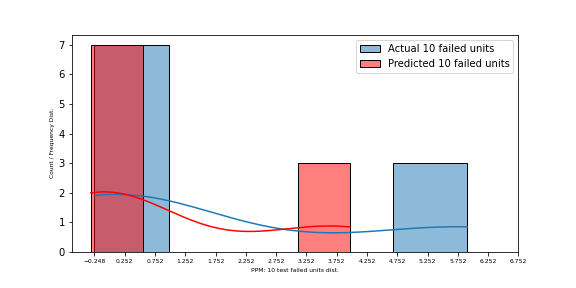

In [48]:
%matplotlib notebook
plt.figure(figsize=(8,4))
sns.histplot(data=test_Actual_failed, x='All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A', kde=True, label='Actual 10 failed units')
sns.histplot(y_test_pred_actual_failed, kde=True, color = "red", label='Predicted 10 failed units')
plt.xlabel("PPM: 10 test failed units dist.", fontsize=6)
plt.ylabel("Count / Frequency Dist.", fontsize=6)
plt.xticks(np.arange(min(test_Actual_failed.iloc[:,1]), max(test_Actual_failed.iloc[:,1])+1, 0.5), fontsize=6)
plt.legend(loc = "upper right", prop={'size': 10})
plt.show()